# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from acs_plotting_maps import plot_acs_hazard, plot_acs_hazard_1pp, plot_acs_hazard_3pp, plot_acs_hazard_1plus3, regions_dict, cmap_dict, tick_dict
import xarray as xr

CPU times: user 34.4 s, sys: 1.13 s, total: 35.6 s
Wall time: 36.7 s


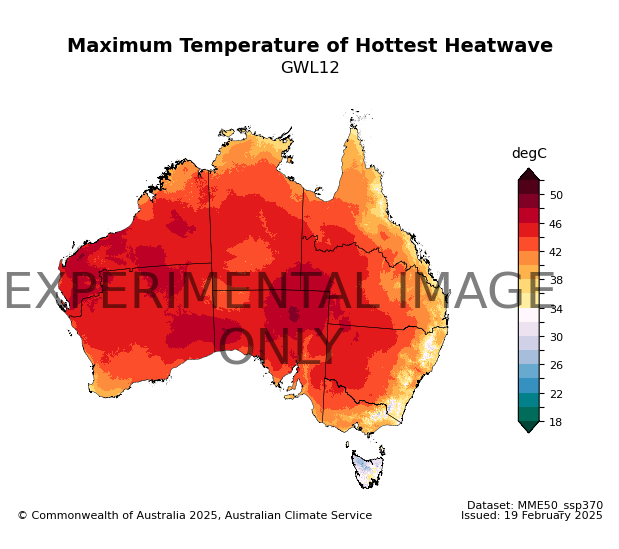

In [3]:
%%time
filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
ds = ds.drop_vars("quantile")

var = "HWAtx"
regions = regions_dict["ncra_regions"].to_crs(crs = "GDA2020")
# stippling_mask = ds[var]>42

fig, ax = plot_acs_hazard_1pp(data = ds[var],
                # stippling=stippling_mask,
                regions = regions,
                title = "Maximum Temperature of Hottest Heatwave",
                date_range = "GWL12",
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                tick_interval=2,
                cbar_label = "degC",
                cbar_extend = "both",                
                dataset_name = "MME50_ssp370",
               watermark_color="k");

CPU times: user 4.64 s, sys: 37.9 ms, total: 4.67 s
Wall time: 4.67 s


(<Figure size 1000x400 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

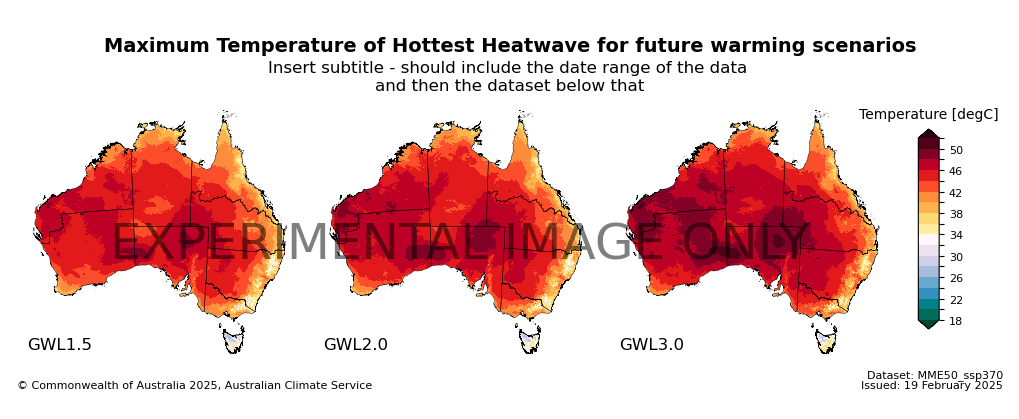

In [4]:
%%time
var = "HWAtx"

ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var], 
                    ds_gwl20 = ds_gwl20[var],
                    ds_gwl30 = ds_gwl30[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Temperature [degC]",
                    title=f"Maximum Temperature of Hottest Heatwave for future warming scenarios", 
                    date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
                    # baseline = "GWL1.2", 
                    dataset_name= "MME50_ssp370",
                    issued_date=None,
                    watermark="EXPERIMENTAL IMAGE ONLY", 
                    watermark_color="k",
                    cmap = cmap_dict["tasmax"],
                    ticks = np.arange(18,53,2),
                    tick_interval=2,
)

CPU times: user 4.59 s, sys: 32.6 ms, total: 4.63 s
Wall time: 4.63 s


(<Figure size 1000x400 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

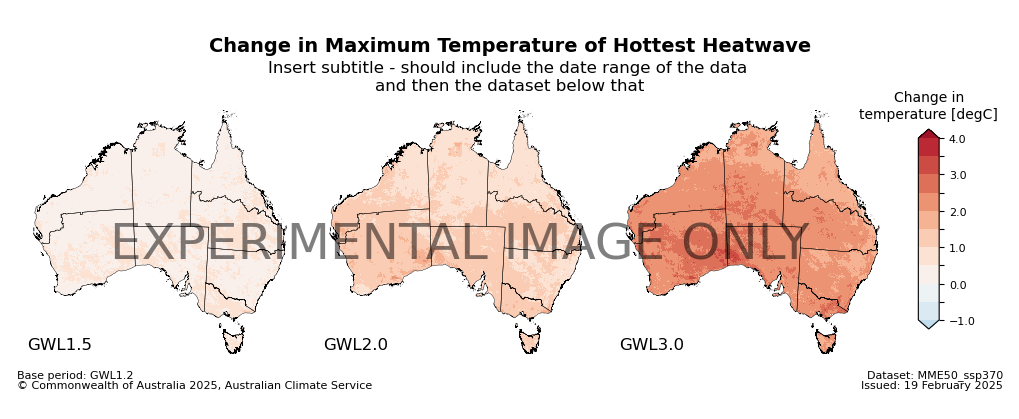

In [5]:
%%time
var = "HWAtx"

# ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
# ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
# ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
# ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var] -ds_gwl12[var], 
                    ds_gwl20 = ds_gwl20[var] -ds_gwl12[var],
                    ds_gwl30 = ds_gwl30[var] -ds_gwl12[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Change in\ntemperature [degC]",
                    title=f"Change in Maximum Temperature of Hottest Heatwave", 
                    date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
                    baseline = "GWL1.2", 
                    dataset_name= "MME50_ssp370",
                    issued_date=None,
                    watermark="EXPERIMENTAL IMAGE ONLY", 
                    watermark_color="k",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-1,4.1,0.5),
                    vcentre=0,
                    tick_interval=2,
)

CPU times: user 5.88 s, sys: 46 ms, total: 5.92 s
Wall time: 5.93 s


(<Figure size 1000x300 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

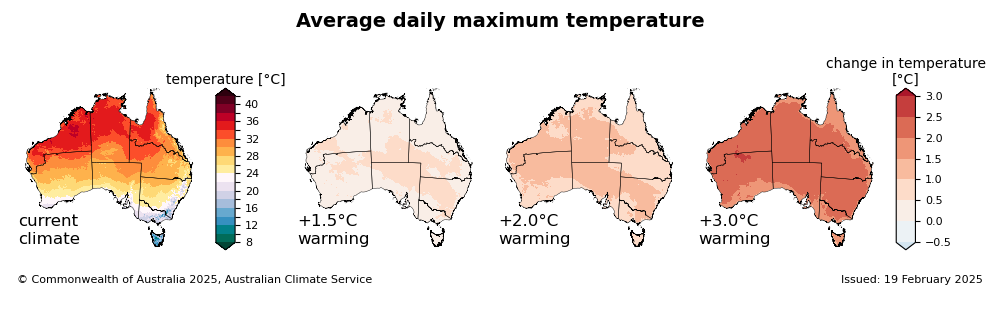

In [6]:
%%time 

var = "TXm"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/TXm/bias-corrected/ensemble/GWL-average/TXm_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15-GWL12-change.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20-GWL12-change.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12[var],
                       ds_gwl15=ds_gwl15[var],
                        ds_gwl20=ds_gwl20[var],
                        ds_gwl30=ds_gwl30[var],
                        regions = regions,
                        title = "Average daily maximum temperature",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(-0.5, 3.1, 0.5),
                        cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                        watermark="",
                         gwl12_cmap=cmap_dict["tasmax"],
                         gwl12_cbar_extend= "both",
                         gwl12_cbar_label= "temperature [\N{DEGREE SIGN}C]",
                         gwl12_ticks= np.arange(8,43,2),
                       gwl12_tick_interval=2,
                       orientation="horizontal",
                        subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                       vcentre=0,
                       tick_rotation=0,
                       gwl12_tick_rotation=0,
                       )

## Step 4: Calculate NCRA region statistics

In [7]:
# import needed packages
from acs_area_statistics import acs_regional_stats, get_regions
import xarray as xr
import numpy as np

mask_ncra = xr.open_dataset("/g/data/ia39/aus-ref-clim-data-nci/shapefiles/masks/AGCD-05i/mask-3D-frac-approx_ncra-regions.nc")
mask_aus = xr.open_dataset("/g/data/ia39/aus-ref-clim-data-nci/shapefiles/masks/AGCD-05i/mask-3D-frac-approx_australia.nc")

mask = xr.concat([mask_ncra,mask_aus], dim="region")
mask["region"] = np.arange(0, len(mask["region"]))
mask

regions = get_regions(["ncra_regions", "australia"])


In [8]:
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = mask["mask"], 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


<xarray.Dataset> Size: 2kB
Dimensions:     (region: 10)
Coordinates:
  * region      (region) int64 80B 0 1 2 3 4 5 6 7 8 9
    abbrevs     (region) <U8 320B 'WANorth' 'WASouth' 'NSW' ... 'QLDSouth' 'AUS'
    names       (region) <U48 2kB 'Western Australia North' ... 'Australia'
Data variables:
    HWAtx_mean  (region) float64 80B 45.06 44.83 42.02 ... 40.94 43.39 43.58
    HWAtx_min   (region) float32 40B 37.44 34.88 25.51 ... 31.03 31.27 23.35
    HWAtx_max   (region) float32 40B 48.87 48.01 46.21 ... 45.41 47.3 48.87
Attributes:
    long_name:      maximum temperature of hottest heatwave
    standard_name:  air_temperature
    units:          degC
    regrid_method:  bilinear
    cell_methods:   time: maximum (interval: YS-JUL)

# Access the docstring for more info

In [9]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='ncra_regions',
    regions=None,
    data=None,
    station_df=None,
    markersize=None,
    stippling=None,
    shading=None,
    mask_not_australia=True,
    mask_australia=False,
    agcd_mask=False,
    facecolor='none',
    edgecolor='black',
    figsize=(6, 4.5),
    title='',
    date_range='',
    projection=None,
    area_linewidth=0.3,
    coastlines=False,
    xlim=(114, 154),
    ylim=(-43.5, -7.5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x154fc7fa6230>,
    cmap_bad='lightgrey',
    cbar_extend='both',
    ticks=None,
    tick_interval=1,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    contourf=False,
    contour=False,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    watermark_color='r',
    infile=None,
    outfile=None,
    savefig=True,
    tick_rotation=None,
    vcentre=None,
)
Docstring:
This function ta

In [10]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds=None,
    infile=None,
    var=None,
    mask=None,
    regions=None,
    dims=None,
    how=None,
    outfile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
    bins=None,
    bin_labels=None,
    chunks=None,
)
Docstring:
This function takes an Xarray dataset (ds) with variable (var)
and multiple dimensions (eg time, lat, and lon),
then selects the time range between two years (start and end),
and applies regions.mask_3D_frac_approx fractional mask (frac)
to compute a regional statistic (how, eg "mean") over two or three dimensions.
Best used with numerical data without nans.

Parameters
----------
ds: xr.Dataset or xr.DataArray
    expects an xr.Dataset with variable var and dimensions time, lat, and lon.

infile: str
    NetCDF file to read in as xr.Dataset

var: str
    name of variable in ds, eg "pr" or "tas".
    If None, then tries to infer the var name from the data

mask:  xarray.DataArray 'mask' or ["fracti